Index(['Unnamed: 0', 'player_name', 'team_abbreviation', 'age',
       'player_height', 'player_weight', 'college', 'country', 'draft_year',
       'draft_round', 'draft_number', 'gp', 'pts', 'reb', 'ast', 'net_rating',
       'oreb_pct', 'dreb_pct', 'usg_pct', 'ts_pct', 'ast_pct', 'season'],
      dtype='object')


/Users/sakethmahavadi/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Mean Squared Error: [4.93918896e+00 2.88459484e-29 9.00654708e-29 1.36600811e-28]
R^2 Score: [0.86518146 1.         1.         1.        ]


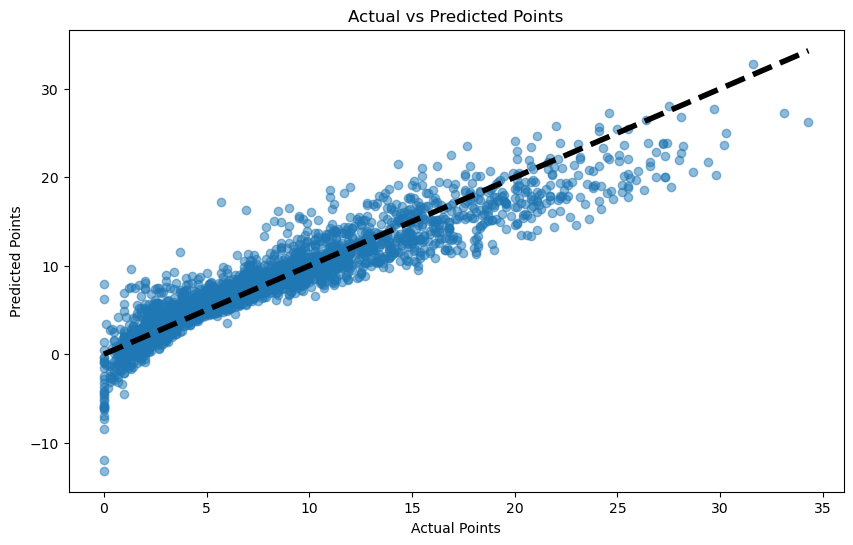

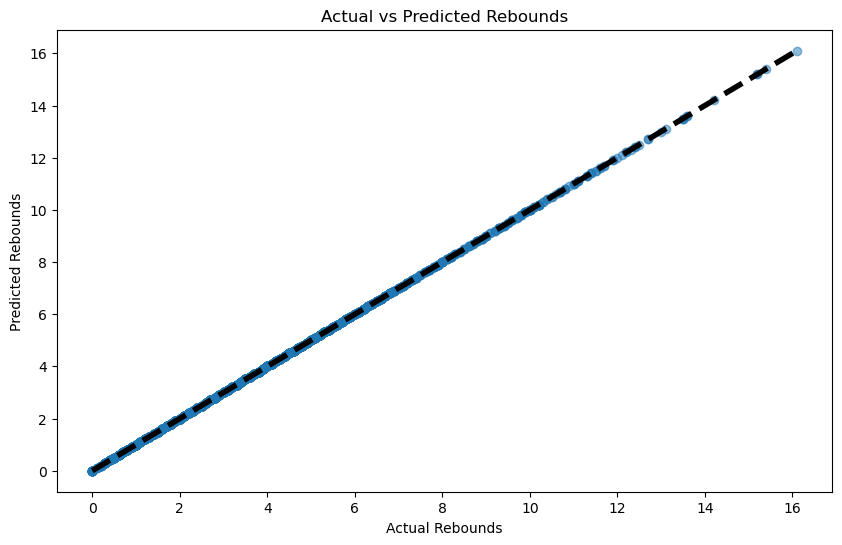

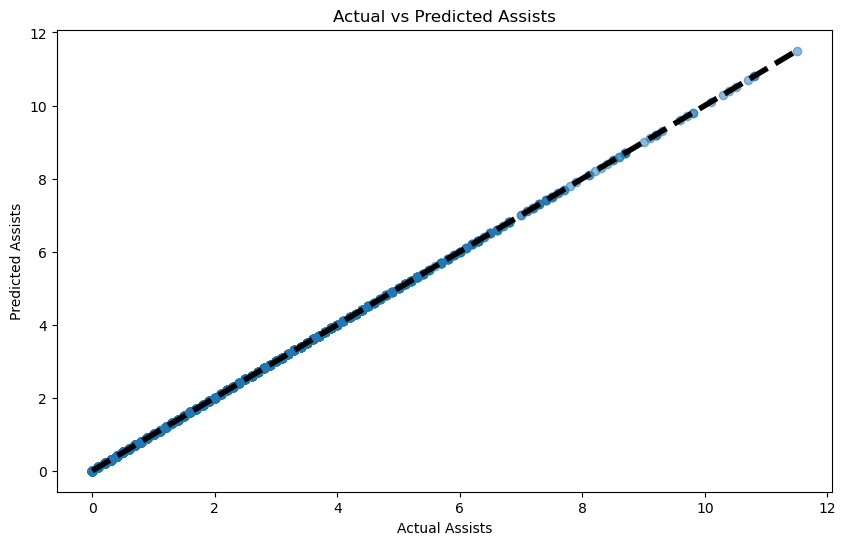

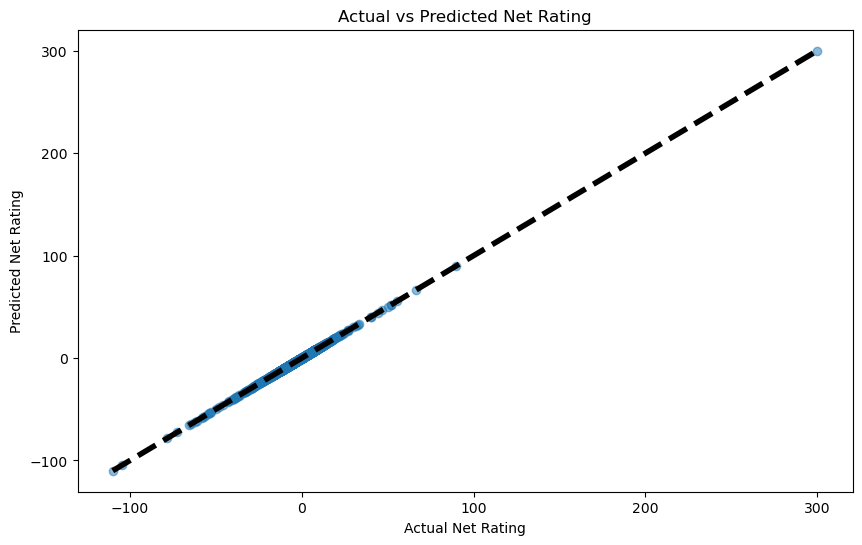

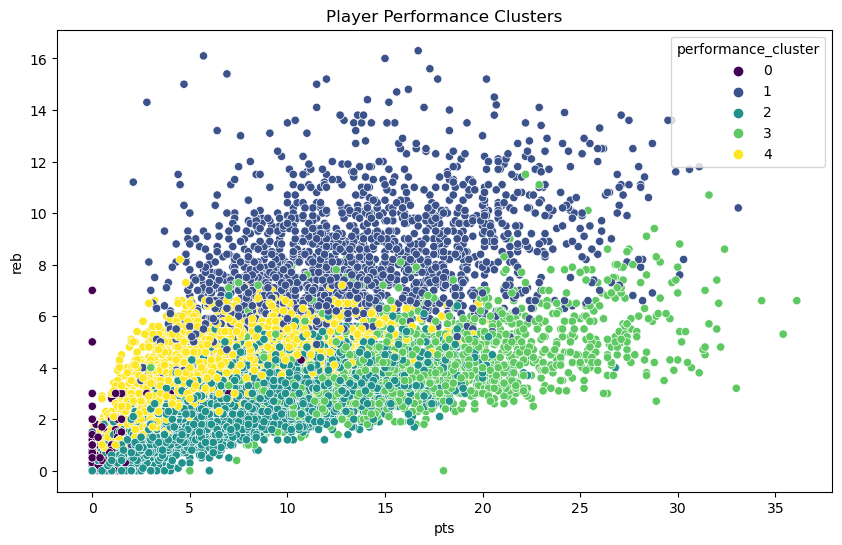

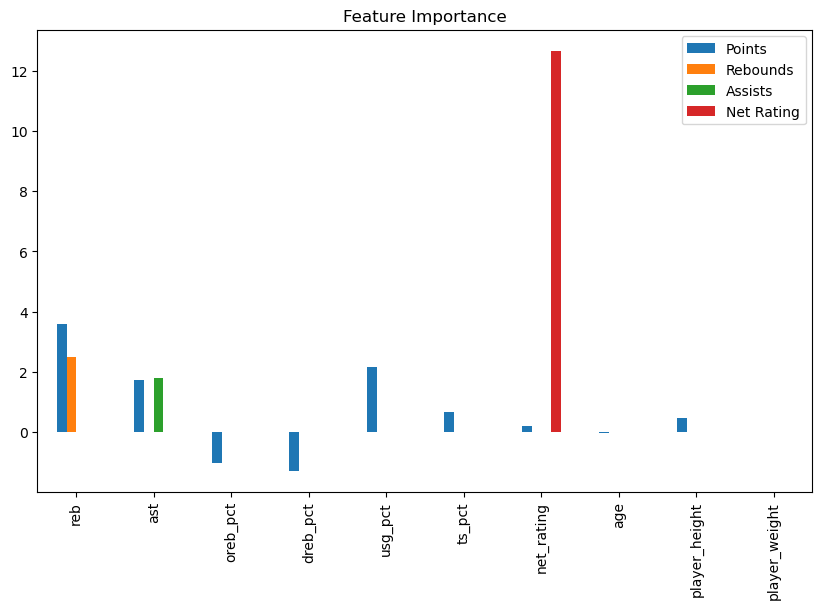

Performance Cluster: [1]
Predicted Performance: [[903.75694099  10.           5.           5.        ]]


/Users/sakethmahavadi/anaconda3/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [8]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns


data = pd.read_csv('all_seasons.csv')

print(data.columns)
data.fillna(method='ffill', inplace=True)
features = data[['reb', 'ast', 'oreb_pct', 'dreb_pct', 'usg_pct', 'ts_pct', 'net_rating', 'age', 'player_height', 'player_weight']]
targets = data[['pts', 'reb', 'ast', 'net_rating']]
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

kmeans = KMeans(n_clusters=5, random_state=42)
data['performance_cluster'] = kmeans.fit_predict(features_scaled)
X_train, X_test, y_train, y_test = train_test_split(features_scaled, targets, test_size=0.2, random_state=42)
regression_model = LinearRegression()
regression_model.fit(X_train, y_train)
y_pred = regression_model.predict(X_test)

mse = mean_squared_error(y_test, y_pred, multioutput='raw_values')
r2 = r2_score(y_test, y_pred, multioutput='raw_values')
print(f'Mean Squared Error: {mse}')
print(f'R^2 Score: {r2}')

plt.figure(figsize=(10, 6))
plt.scatter(y_test['pts'], y_pred[:, 0], alpha=0.5)
plt.plot([y_test['pts'].min(), y_test['pts'].max()], [y_test['pts'].min(), y_test['pts'].max()], 'k--', lw=4)
plt.xlabel('Actual Points')
plt.ylabel('Predicted Points')
plt.title('Actual vs Predicted Points')
plt.show()

plt.figure(figsize=(10, 6))
plt.scatter(y_test['reb'], y_pred[:, 1], alpha=0.5)
plt.plot([y_test['reb'].min(), y_test['reb'].max()], [y_test['reb'].min(), y_test['reb'].max()], 'k--', lw=4)
plt.xlabel('Actual Rebounds')
plt.ylabel('Predicted Rebounds')
plt.title('Actual vs Predicted Rebounds')
plt.show()

plt.figure(figsize=(10, 6))
plt.scatter(y_test['ast'], y_pred[:, 2], alpha=0.5)
plt.plot([y_test['ast'].min(), y_test['ast'].max()], [y_test['ast'].min(), y_test['ast'].max()], 'k--', lw=4)
plt.xlabel('Actual Assists')
plt.ylabel('Predicted Assists')
plt.title('Actual vs Predicted Assists')
plt.show()

plt.figure(figsize=(10, 6))
plt.scatter(y_test['net_rating'], y_pred[:, 3], alpha=0.5)
plt.plot([y_test['net_rating'].min(), y_test['net_rating'].max()], [y_test['net_rating'].min(), y_test['net_rating'].max()], 'k--', lw=4)
plt.xlabel('Actual Net Rating')
plt.ylabel('Predicted Net Rating')
plt.title('Actual vs Predicted Net Rating')
plt.show()

plt.figure(figsize=(10, 6))
sns.scatterplot(x='pts', y='reb', hue='performance_cluster', data=data, palette='viridis')
plt.title('Player Performance Clusters')
plt.show()

coefficients = pd.DataFrame(regression_model.coef_, columns=features.columns, index=['Points', 'Rebounds', 'Assists', 'Net Rating'])
coefficients.T.plot(kind='bar', figsize=(10, 6))
plt.title('Feature Importance')
plt.show()

import joblib
joblib.dump(regression_model, 'nba_playoff_prediction_model.pkl')
joblib.dump(kmeans, 'kmeans_model.pkl')

def predict_performance(player_stats):
    player_stats_scaled = scaler.transform([player_stats])
    cluster = kmeans.predict(player_stats_scaled)
    predicted_performance = regression_model.predict(player_stats_scaled)
    return cluster, predicted_performance

example_player_stats = [10, 5, 10, 20, 30, 50, 5, 25, 80, 220]  
cluster, performance = predict_performance(example_player_stats)
print(f'Performance Cluster: {cluster}')
print(f'Predicted Performance: {performance}')



